
# Diagnosing Heart Disease of Patient's based on Age, Resting Blood Pressure, Cholesterol, and Max Heart Rate.

## Group 30: Toby Lau, Neil Lin, Tanish Gupta, Kristy Fielding

### Background Information & Introduction

Heart disease is one of the leading causes of death around the world that is caused by a wide variety of factors. Common heart diseases include coronary heart disease, arrhythmias, strokes, etc. Throughout the 21st century, medical professionals have deduced how certain factors may give leeway to one having a certain type of heart disease and the extent of its danger to the human body (Centers for Disease Control and Prevention, 2023). In this project, we will try to determine whether a patient has heart disease given the relevant predictors. The dataset being used is a combination of datasets of patients who were suspected to have heart disease from Cleveland and Switzerland. The dataset contains 14 attributes that could contribute to a patient's heart disease. Of the 14, we hope to train a model that is able to classify these stages given some attributes.

**Research Question: How can age, resting blood pressure, cholesterol, and max heart rate diagnose heart disease in patients from the West?**


## Methods
To create the model, we will be combining two datasets from the same source so that we have more data to train and test on. In doing so, we capture a greater variety of data as patients from different parts of the world also have different lifestyles.

### Data reading and wrangling
1. Import the required libraries and load both datasets from the web.
3. Assign the correct column names and types to the dataset
4. Combine both datasets.
5. Wrangle the dataset into a tidy format.
6. Split the data into training and testing sets
7. Summarize and visualize data

### Hyperparameter Tuning
1. Set a seed.
2. Create a recipe that defines the "stage" column as our response variable and "age", "restbps", "chol", and "thalach" columns as predictors.
3. Standardize predictors using step_scale and step_center on all predictors.
4. Create a $k$-nn model  with the neighbors = tune() parameter.
5. Create a tibble with a single neighbors column containing numbers from 1 to 100.
6. Perform Cross-validation on 10 folds to tune the model and find the best $k$ value.
7. Plot the accuracy of the model against the number of neighbors to determine the $k$ value with the highest accuracy.
8. Using the $k$ value that obtained the highest accuracy, create a new $k$-nn model

### Evaluating
1. Test the model using our testing data set.
2. Check for over/underfitting.
3. Create a confusion matrix
4. Assess the model's performance using tidymodels.


### Data reading and wrangling
First, we import the necessary libraries.

In [1]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(tidymodels)
install.packages("themis")
library(themis)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘GGally’ was built under R version 4.3.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowset

Then we read in both our datasets. They come from the same source but have different URLS. We know from the data source the name of each column thanks to a variable list, so we can read use "read_csv" with the col_names argument set to a list of column names.

In [2]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
hungarian_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
head(cleveland_data)
head(hungarian_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0


Figure 1\
Looking at figure 1, we can notice that some of the columns which are supposed to be exactly the same have different types. The data source also tells us the correct type of each column so we can mutate both datasets accordingly.

In [3]:
cleveland_data <- cleveland_data |> mutate(age = as.integer(age), sex = as.factor(sex), cp = as.factor(cp), trestbps = as.integer(trestbps), 
                                           chol = as.integer(chol), fbs = as.factor(fbs), restecg = as.factor(restecg),  thalach = as.integer(thalach),
                                           exang = as.factor(exang), oldpeak = as.integer(oldpeak), slope = as.factor(slope), ca = as.integer(ca), 
                                           thal = as.factor(thal), num = as.integer(num))
hungarian_data <- hungarian_data |> mutate(age = as.integer(age), sex = as.factor(sex), cp = as.factor(cp), trestbps = as.integer(trestbps), 
                                           chol = as.integer(chol), fbs = as.factor(fbs), restecg = as.factor(restecg),  thalach = as.integer(thalach),
                                           exang = as.factor(exang), oldpeak = as.integer(oldpeak), slope = as.factor(slope), ca = as.integer(ca), 
                                           thal = as.factor(thal), num = as.integer(num))
head(cleveland_data)
head(hungarian_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.integer(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>
63,1,1,145,233,1,2,150,0,2,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2,2,2,7.0,1
37,1,3,130,250,0,0,187,0,3,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1,1,0,3.0,0
56,1,2,120,236,0,0,178,0,0,1,0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>
28,1,2,130,132,0,2,185,0,0,?,NA,?,0
29,1,2,120,243,0,0,160,0,0,?,NA,?,0
29,1,2,140,NA,0,0,170,0,0,?,NA,?,0
30,0,1,170,237,0,1,170,0,0,?,NA,6,0
31,0,2,100,219,0,1,150,0,0,?,NA,?,0
32,0,2,105,198,0,0,165,0,0,?,NA,?,0


Figure 2\
Although unclean, the datasets in figure 2 should have the same type in each column which allows us to combine the two. We will call this new resulting dataset "data_all". We also don't need every single column the dataset provides, so we will also select only the ones we need.

In [4]:
data_all <- bind_rows(cleveland_data, hungarian_data) |> select(age, trestbps, chol, thalach, -ca, -thal, num)
head(data_all)
nrow(data_all)

age,trestbps,chol,thalach,num
<int>,<int>,<int>,<int>,<int>
63,145,233,150,0
67,160,286,108,2
67,120,229,129,1
37,130,250,187,0
41,130,204,172,0
56,120,236,178,0


[1] 597

Figure 3\
With all our data in one tibble, we can move on to the actual cleaning. First we see whether there are any null values.

In [5]:
nulls <- data_all |> map_df(\(c) sum(is.na(c)))
nulls

age,trestbps,chol,thalach,num
<int>,<int>,<int>,<int>,<int>
0,1,23,1,0


Figure 4\
According to the figure above, there are still a few null values in the "trestbps", "chol", and "thalach" columns. So we must filter those values out.

In [16]:
data_clean <- data_all |> filter(!is.na(trestbps)) |> filter(!is.na(chol)) |> filter(!is.na(thalach))
nrow(data_clean)

[1] 573

This leaves us with 573 rows in the dataset left but this should still be sufficient.

Now, we decided to count the number of observations for each "num" category. To check how balanced the dataset is.

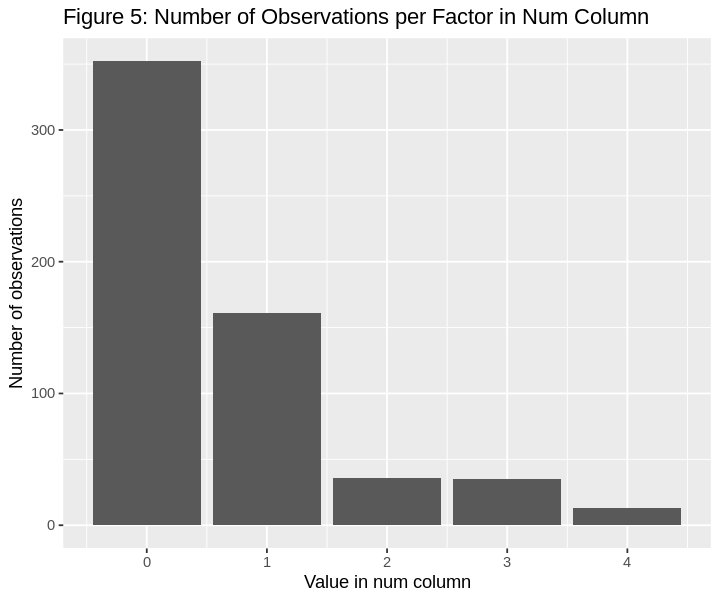

In [17]:
options(repr.plot.width = 6, repr.plot.height=5)
summary <- data_all |> group_by(num) |> summarize(count = n())
summary_plot <- summary |> ggplot(aes(num,count)) +
    geom_bar(stat = "identity") +
    labs(x = "Value in num column", y = "Number of observations") +
    ggtitle("Figure 5: Number of Observations per Factor in Num Column")
summary_plot

Figure 5\
Unfortunately, according to figure 5, our dataset is extremely imbalanced. So we've decided to create a new class that merges values of num from 1 to 4. 

According to the data source, values of 0 in the num column represent patients with <50% vessel diameter narrowing while values > 0 in the num column represent patients with >50% vessel diameter narrowing. Since mild heart disease is classified as <50% narrowing, moderate heart disease is classified as 50-80% narrowing, and severe heart disease is 80-100% narrowing (Cleveland Clinic). We can bucket the "num" values into respective "mild", "moderate", and "severe" classes into a new "stage" column. However, due to the class imbalance, we have decided to combine the "moderate" and "severe" classes. This corresponds to num values of 1-4. The following table represents how the new "stage" column relates to "num".

| Num value | Percentage blockage | Stage |
| -------- | ------- | ----|
| 0 | < 50% | Mild |
| 1-4 | > 50% | Moderate/Severe |

With only two classes, we will perform a binary classification instead.

age,trestbps,chol,thalach,num,stage
<int>,<int>,<int>,<int>,<int>,<fct>
63,145,233,150,0,Mild
67,160,286,108,2,Moderate/Severe
67,120,229,129,1,Moderate/Severe
37,130,250,187,0,Mild
41,130,204,172,0,Mild
56,120,236,178,0,Mild


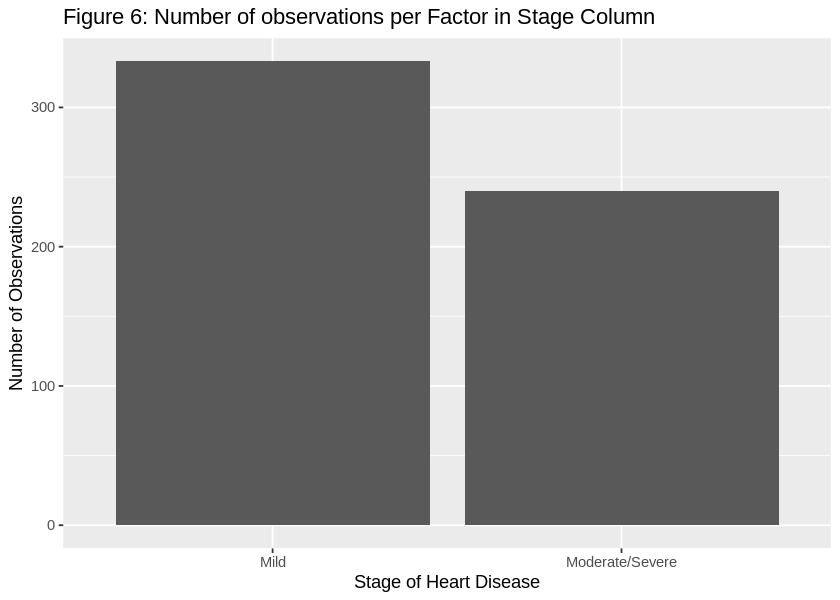

In [18]:
options(repr.plot.width = 7, repr.plot.height=5)

data_clean <- data_clean |> 
    mutate(stage = cut(num, breaks=c(-Inf,0,4), labels=c("Mild","Moderate/Severe")))
head(data_clean)
data_clean_summary <- data_clean |> group_by(stage) |> summarize(count = n()) |> ggplot(aes(stage,count)) +
    geom_bar(stat = "identity") +
    labs(x = "Stage of Heart Disease", y = "Number of Observations") +
    ggtitle("Figure 6: Number of observations per Factor in Stage Column")
data_clean_summary

Figure 7\
By combining the classes, we improve the balance of the classes slightly but not as much as we would like. We will most likely have to upsample when creating the model's recipe.

In [19]:
set.seed(69)

split <- initial_split(data_clean, prop=0.75, strata = stage)
data_training <- training(split)
data_testing <- testing(split)

n_training <- nrow(data_training)
n_testing <- nrow(data_testing)
nrow(data_training)
nrow(data_testing)


[1] 429

[1] 144

Splitting our data into training and testing datasets using initial_split will ensure that bias and order were removed. There are 429 rows (75%) in the training set and 144 rows (25%) in the testing set. With this respective proportion, we will have enough data to sufficiently train our model and then utilize the testing set to evaluate its performance on unseen data. 

In [20]:
training_summary <- data_training |> group_by(stage) |> summarize(count = n(), Prop = (n()/n_training)*100)
training_summary

stage,count,Prop
<fct>,<int>,<dbl>
Mild,249,58.04196
Moderate/Severe,180,41.95804


Figure 8\
Within the training dataset, 58% of the data belongs to the "Mild" class while 46% of the data belongs to the "Moderate/Severe" class. In addition to the upsampling later, this should sufficiently reduce the bias in our model. To make sure the two classes are distinguishable we tabulate some each class' properties below.

In [21]:
training_means <- data_training |> group_by(stage) |> summarize(mean_age = mean(age), mean_trestbps = mean(trestbps), mean_chol = mean(chol), mean_thalach = mean(thalach))
training_means

stage,mean_age,mean_trestbps,mean_chol,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Mild,50.03213,130.1727,238.3494,150.7550
Moderate/Severe,53.01111,135.4111,261.5389,134.3611


Figure 9\
According to the table above, there is quite a considerable difference in the mean of each predictor for each class. It shows that patients in the "Moderate/Severe" stage are older, have a higher resting heart rate, and higher levels of cholesterol but a lower max heart rate while the opposite is true for patients in the "Mild" stage.

### Summarizing and Visualizing the Data
With our training set, we can summarize and visualize our training data to uncover any underlying patterns in relation to our new "stage" column. The following code represents a ggpairs plot on our training data set that plots each predictor against each other. 

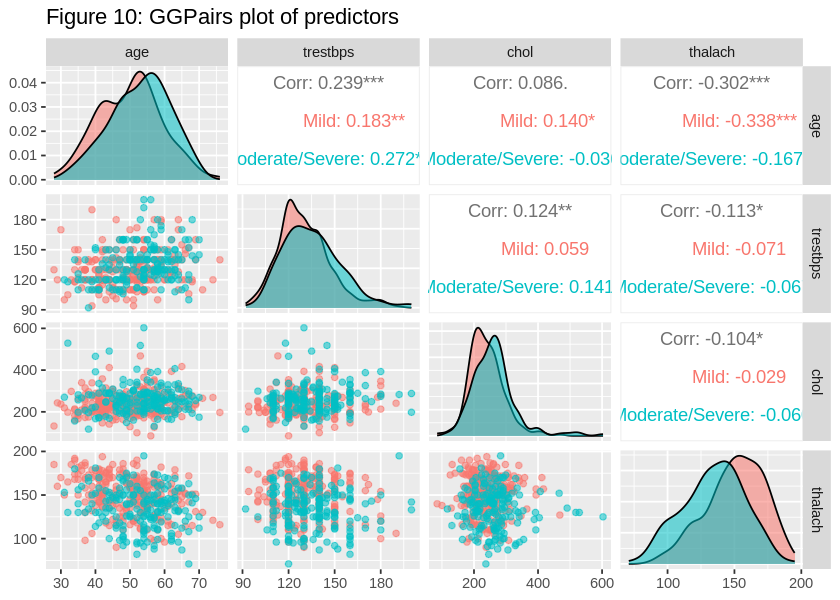

In [22]:
options(options.repr.width = 10, options.repr.height = 10)

ggpair <- ggpairs(data_training, columns = 1:4, ggplot2::aes(colour = stage,alpha = 0.5), title="Figure 10: GGPairs plot of predictors")
ggpair

We can see that for some predictors there are fairly distinct regions that distinguish between the two classes we are predicting. For example, patient's with mild heart disease tend to have a higher maximum heart rate and patient's who are older tend to have more cholesterol.

The ggpairs plot also contains density plots to see how each the density of each predictor changes with class. This tells us on average, that patient's with mild heart disease are younger and patient's with a lower maximum heart rate have moderate/severe heart disease. Overall, our data should be sufficient in creating a viable model.

### Identifying the Ideal K Value

To identify the ideal K value, we create a model for each $k$ from 1 to 100 and select the $K$ value that obtained the highest accuracy. First, we need to create a recipe to upsample the data. To upsample data, we decided to use the SMOTE (Synthetic Minority Over-sampling Technique) since we believed that it should produce more reliable and varied data. Nevertheless, upsampled data may be inaccurate so we upsampled only up to 95% of the observations of the majority class. This means the minority class will have 95% of the number of rows of the majority class. We also decided to use a seed of 69 to ensure reproducibility.

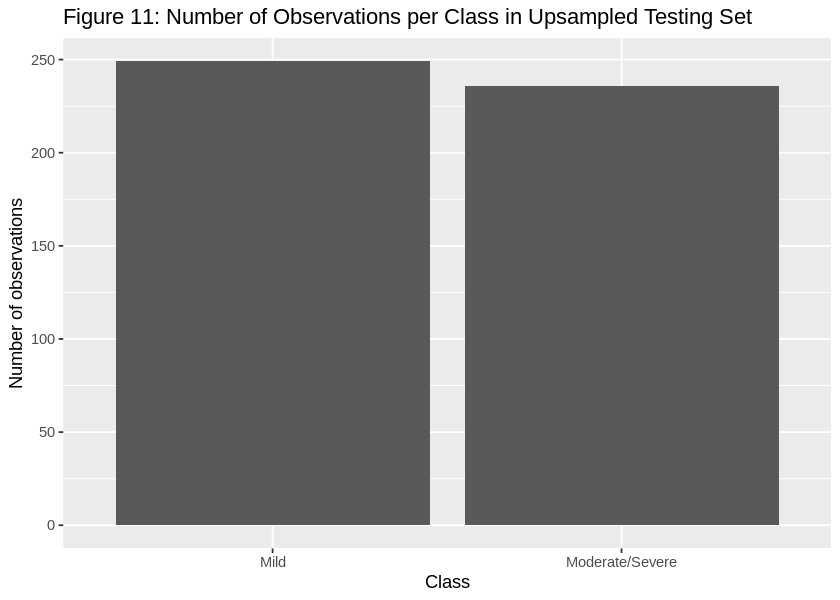

In [23]:
set.seed(69)

recipe <- recipe(stage ~ age + chol + trestbps + thalach, data = data_training) |>
    step_smote(stage, over_ratio=0.95) |>
    step_scale(all_predictors()) |> 
    step_center(all_predictors()) 

data_testing_new <- recipe |>
    prep() |>
    bake(NULL) |>
    group_by(stage) |>
    summarize(count = n()) |>
    ggplot(aes(stage, count)) +
    geom_bar(stat = "identity") +
    labs(x = "Class", y = "Number of observations") +
    ggtitle("Figure 11: Number of Observations per Class in Upsampled Testing Set")
data_testing_new


Now we can create our model. We decided to use a 10-fold cross validation as we believed this should be the best balance between accuracy and our computing power. Using a tibble with a single "neighbors" column containing values from 1 to 100, we created a model for each value and plotted its accuracy.

In [24]:
set.seed(69)

k_vals <- tibble(neighbors = seq(1,100,1))

tune_recipe <- recipe(stage ~ age + chol + trestbps + thalach, data = data_training) |>
    step_smote(stage) |>
    step_scale(all_predictors()) |> 
    step_center(all_predictors())

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

tune_cv <- vfold_cv(data_training, v = 10, strata = stage)

tune_wf <- workflow() |>
    add_recipe(recipe) |>
    add_model(tune_spec)

tune_results <- tune_wf |>
    tune_grid(resamples = tune_cv, grid = k_vals) |>
    collect_metrics()

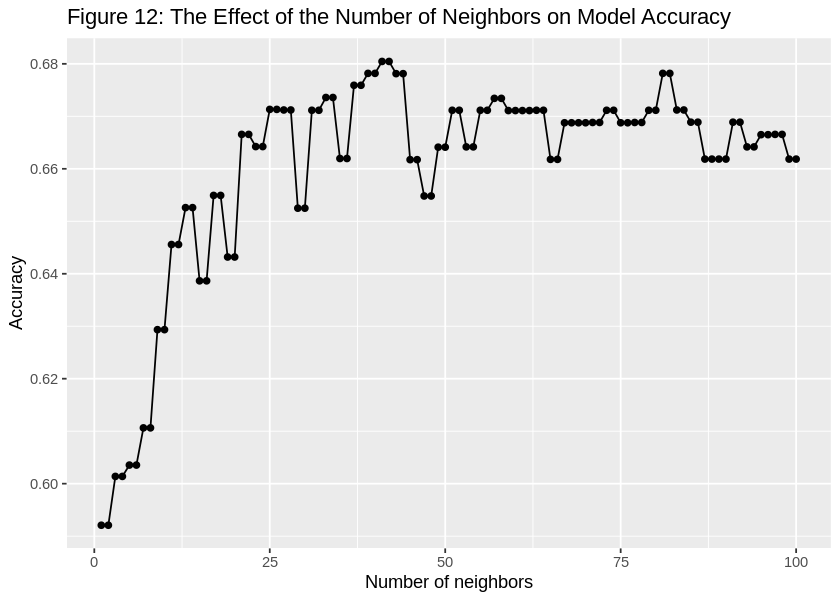

In [25]:
options(repr.plot.width=7, repr.plot.height=5)

k_vs_accuracy <- tune_results |> filter(.metric == "accuracy") |> ggplot(aes(neighbors, mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of neighbors", y = "Accuracy") +
    ggtitle("Figure 12: The Effect of the Number of Neighbors on Model Accuracy")
k_vs_accuracy

Looking at the plot above, we can see that the accuracy of the model is the best when $k$ is roughly 40. We can narrow down the value we need by outputting the table and arranging the "mean" column in descending order.

In [26]:
ideal_k_table <- tune_results |> filter(.metric == "accuracy") |> arrange(desc(mean)) |> slice(1:5)
best_k <- ideal_k_table |> slice(1) |> select(neighbors) |> pull()
ideal_k_table

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,accuracy,binary,0.6804540,10,0.02388287,Preprocessor1_Model041
42,accuracy,binary,0.6804540,10,0.02388287,Preprocessor1_Model042
39,accuracy,binary,0.6781838,10,0.02291833,Preprocessor1_Model039
40,accuracy,binary,0.6781838,10,0.02291833,Preprocessor1_Model040
81,accuracy,binary,0.6781838,10,0.02369188,Preprocessor1_Model081


Figure 13\
We can see from the table above that 41 neighbors obtained the best accuracy of approximately 68%, meaning our ideal $k$ is 41. This $k$ value is saved to a variable called "best_k" for use later on.

### Building New Model
With our ideal $k$ value, we will build a new model and test it using our testing data set. 

In [27]:
final_spec <- nearest_neighbor(weight_func= "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

final_workflow <- workflow() |>
    add_recipe(recipe)|>
    add_model(final_spec) |>
    fit(data = data_training)
final_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_smote()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(41,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3278351
Best kernel: rectangular
Best k: 41

### Testing New Model

In [258]:
set.seed(69)

predictions <- final_workflow |> predict(data_testing) |>
               bind_cols(data_testing)

# predictions 
metrics<- predictions |>
    metrics(truth = stage, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

conf_mat<- predictions |>
    conf_mat(truth = stage, estimate = .pred_class)
conf_mat
     

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6736111


                 Truth
Prediction        Mild Moderate/Severe
  Mild              60              23
  Moderate/Severe   24              37

### Versatility

In [269]:
set.seed(69)

va <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
va <- va |> mutate(age = as.integer(age), sex = as.factor(sex), cp = as.factor(cp), trestbps = as.integer(trestbps), 
                                           chol = as.integer(chol), fbs = as.factor(fbs), restecg = as.factor(restecg),  thalach = as.integer(thalach),
                                           exang = as.factor(exang), oldpeak = as.integer(oldpeak), slope = as.factor(slope), ca = as.integer(ca), 
                                           thal = as.factor(thal), num = as.integer(num))  |> select(age, trestbps, chol, thalach, -ca, -thal, num) 
va <- va |> filter(chol != 0) |> filter(thalach != "?") |> filter(trestbps != "?") |> filter(num != "?") |>
        mutate(stage = cut(num, breaks=c(-Inf,0,4), labels=c("Mild","Moderate/Severe")))

balance <- va |> group_by(stage) |> summarize(count = n())
balance

predictions <- final_workflow |> predict(va) |>
               bind_cols(va)

# predictions 
metrics<- predictions |>
    metrics(truth = stage, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

conf_mat<- predictions |>
    conf_mat(truth = stage, estimate = .pred_class)
conf_mat

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.integer(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”


stage,count
<fct>,<int>
Mild,23
Moderate/Severe,79


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8039216


                 Truth
Prediction        Mild Moderate/Severe
  Mild              10               7
  Moderate/Severe   13              72

High accuracy but imbalanced classes. Suggests that are model is good at detecting moderate/severe cases of heart disease.

## Discussion

## References